# 04 합성곱 신경망 (CNN)
## 01 합성곱 신경망

- 예시: 이미지 분류, 객체 탐지, 스타일 전이
  - 객체 탐지 : 이미지에서 특정 객체를 인식 + 위치 파악
  - 스타일전이 : 콘텐츠 이미지와 스타일 참조 이미지를 이용하여 포맷 유지 하에 새로운 이미지 생성

### 1-1 이미지 표현
- RGB 0~255로 구성
- 3장의 이미지를 겹쳐서 하나의 이미지로 표현

### 1-2 합성곱
- 정방형 크기를 가지는 커널 사용하여 이미지에 대한 특성 추출
- n*n 개의 가중치를 가지고, 백워드 수행시 커널의 가중치 업데이트


### 1-3 채널
- 입력 이미지를 구현하는 2차원 배열의 개수


### 1-4 스트라이드
- 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 하는데 이때 이동 간격을 말함


### 1-5 패딩
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정



### 1-6 특성맵 사이즈
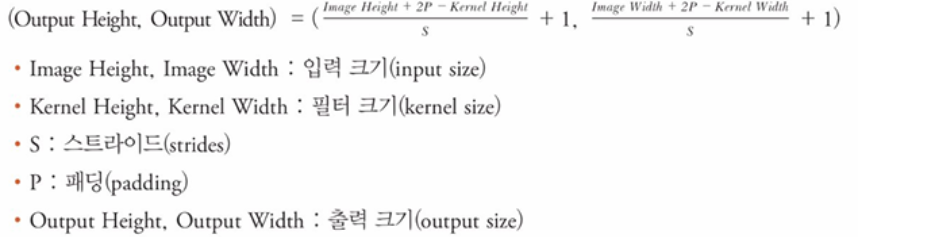


### 1-7 풀링
- 추출된 특성 맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 연산량 감소하고 과대적합 방지



## 02 간단한 모델 생성

In [1]:
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


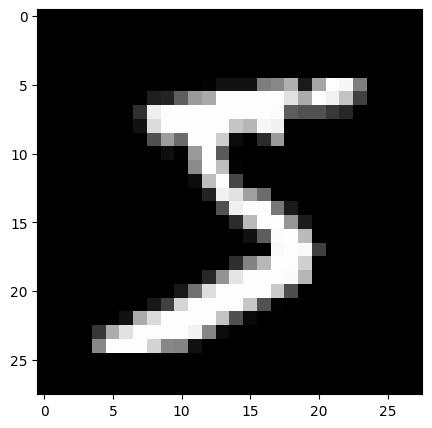

In [3]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx],cmap='gray')
  plt.show()

plot_image(x_train,0)

In [4]:
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0 255
0 255


In [5]:
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- CNN 모델에 주입하기 위해서 색상을 나타내는 채널 추가
- 채널을 추가하고자 하는 위치에 tf.newaxis를 작성

In [6]:
# 채널 추가
print(x_train.shape,x_valid.shape)

x_train_in = x_train [..., tf.newaxis]
x_valid_in = x_valid [..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습
- 합성곱 레이어 1개, 풀링 레이어 1개를 적용 간단모델

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    # Convolution 적용( 32 filters )
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')

                           ])

In [8]:
# 모델 컴피일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in,y_train,
                  validation_data=(x_valid_in,y_valid),
                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2256 - accuracy: 0.9362 - val_loss: 0.1014 - val_accuracy: 0.9688
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0854 - accuracy: 0.9760 - val_loss: 0.0759 - val_accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0637 - accuracy: 0.9814 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0517 - accuracy: 0.9847 - val_loss: 0.0697 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0596 - val_accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0499 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0586 -

In [9]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 3s 10ms/step - loss: 0.0604 - accuracy: 0.9836


[0.060388777405023575, 0.9836000204086304]

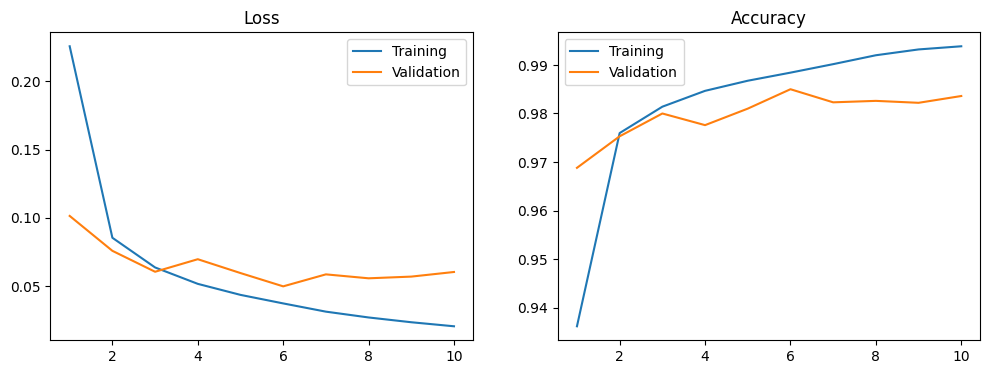

In [10]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악


In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


가장 앞에 있는 축의 None 값은 배치 크기로 어떤 값이든 가능

In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
model.layers

In [15]:
# 첫번째 레이어 선택
model.layers[0]

In [16]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.2095258 , -0.5634266 , -1.0326139 , -1.1255759 ,
            0.20654498, -0.50673753,  0.1989447 ,  0.31262982,
           -0.06620601, -0.7160193 ,  0.29559445,  0.35230815,
            0.2444876 ,  0.11395982, -0.23459762, -0.3107827 ,
            0.44626808,  0.04088936,  0.29695144, -0.16635633,
           -0.01261794,  0.1750302 ,  0.03661614,  0.14239562,
           -0.25460988, -1.0728639 ,  0.32090145, -0.285513  ,
            0.21840261, -0.8188691 , -0.10586772, -0.6035922 ]],
 
         [[ 0.07101256,  0.09209436, -0.35139716, -0.7678024 ,
           -0.04492762,  0.31296456, -0.11490989,  0.16092509,
            0.03608431,  0.16538702,  0.2185666 ,  0.16146298,
           -0.05237086,  0.3658809 , -0.51469374, -0.499506  ,
            0.18486406,  0.57873774,  0.37426782, -0.65673697,
            0.69246924,  0.3874198 ,  0.4068514 , -0.38253784,
           -0.13326672, -0.7670877 ,  0.15

In [19]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.2095258 , -0.5634266 , -1.0326139 , -1.1255759 ,
           0.20654498, -0.50673753,  0.1989447 ,  0.31262982,
          -0.06620601, -0.7160193 ,  0.29559445,  0.35230815,
           0.2444876 ,  0.11395982, -0.23459762, -0.3107827 ,
           0.44626808,  0.04088936,  0.29695144, -0.16635633,
          -0.01261794,  0.1750302 ,  0.03661614,  0.14239562,
          -0.25460988, -1.0728639 ,  0.32090145, -0.285513  ,
           0.21840261, -0.8188691 , -0.10586772, -0.6035922 ]],

        [[ 0.07101256,  0.09209436, -0.35139716, -0.7678024 ,
          -0.04492762,  0.31296456, -0.11490989,  0.16092509,
           0.03608431,  0.16538702,  0.2185666 ,  0.16146298,
          -0.05237086,  0.3658809 , -0.51469374, -0.499506  ,
           0.18486406,  0.57873774,  0.37426782, -0.65673697,
           0.69246924,  0.3874198 ,  0.4068514 , -0.38253784,
          -0.13326672, -0.7670877 ,  0.15893507,  0.203035

In [20]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.25881803, -0.40636584, -0.06727355, -0.0043965 , -0.3990482 ,
       -0.233676  , -0.17654257, -0.40453815, -0.00400482, -0.03468403,
       -0.32279086, -0.34722576, -0.20973708, -0.33208144, -0.18583833,
       -0.00620021,  0.01069508,  0.00260048, -0.25903812, -0.1379095 ,
       -0.01196973, -0.01114501, -0.23584133, -0.21229604, -0.19590871,
        0.19287989, -0.31400818, -0.34396127, -0.4039423 , -0.20180744,
        0.00294576, -0.24893539], dtype=float32)>

In [21]:
# 레이어 이름 이용하여 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator=tf.keras.Model(inputs=model.input,
                         outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 98ms/step


2

In [23]:
# 첫번째 레이어 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

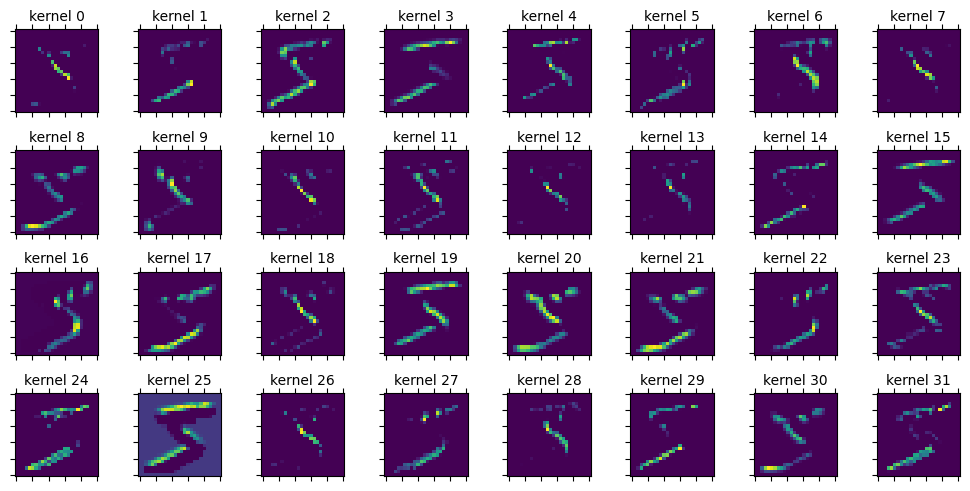

In [24]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

- 각 커널로 구분되어 입력 이미지로부터 서로 다른 피처를 추출 후 시각화

In [25]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
pooling_activation.shape

(1, 13, 13, 32)

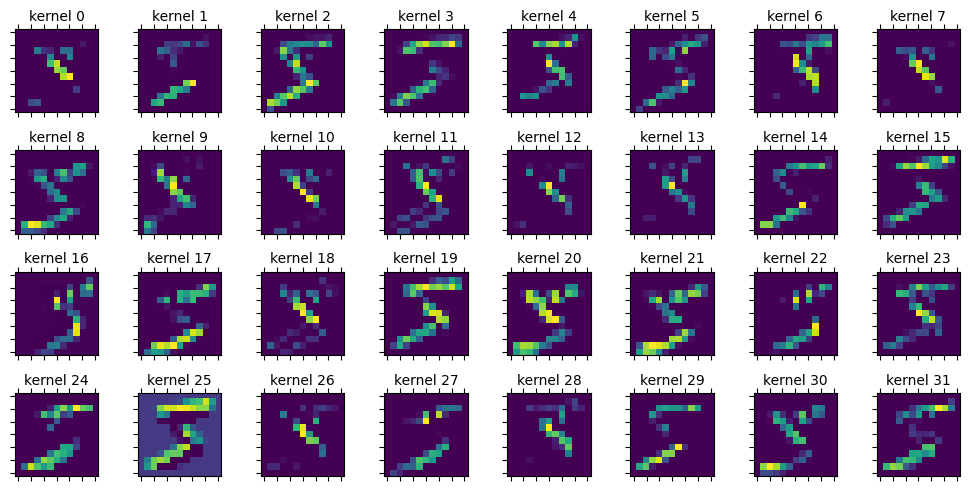

In [26]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()


## 03 복잡한 모델 생성
### 3-1 데이터셋 준비
- 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델

In [27]:
# tensorflow 모듈 import
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


0~9까지 숫자를 맞추는 정답 + 홀수인지 짝수인지 판단하는 정답

In [28]:
# 새로운 출력 값 배열 생성(홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [29]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [30]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y % 2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [31]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 functional api 로 다중입력 및 다중 출력 레이어 생성

In [32]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

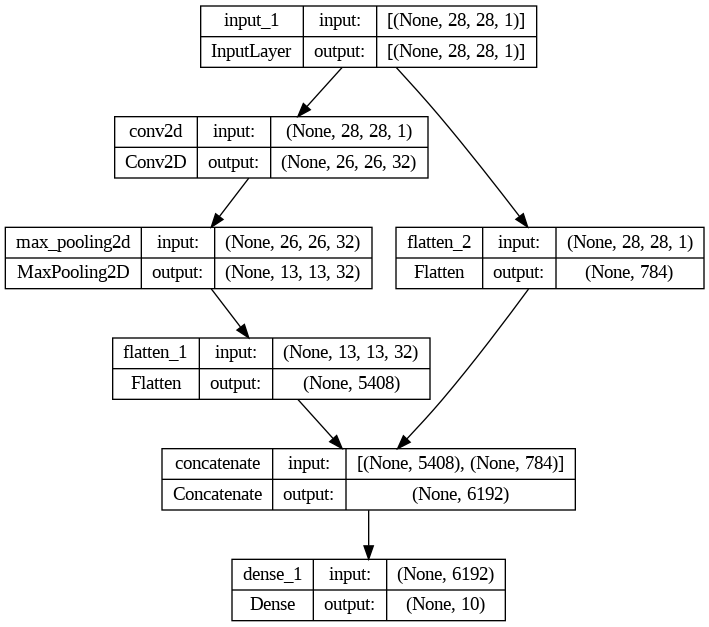

In [33]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2041 - accuracy: 0.9399 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0773 - accuracy: 0.9769 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0657 - val_accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0627 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0585 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0544 -

### 3-3 다중 출력 분류 모델


In [35]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [36]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


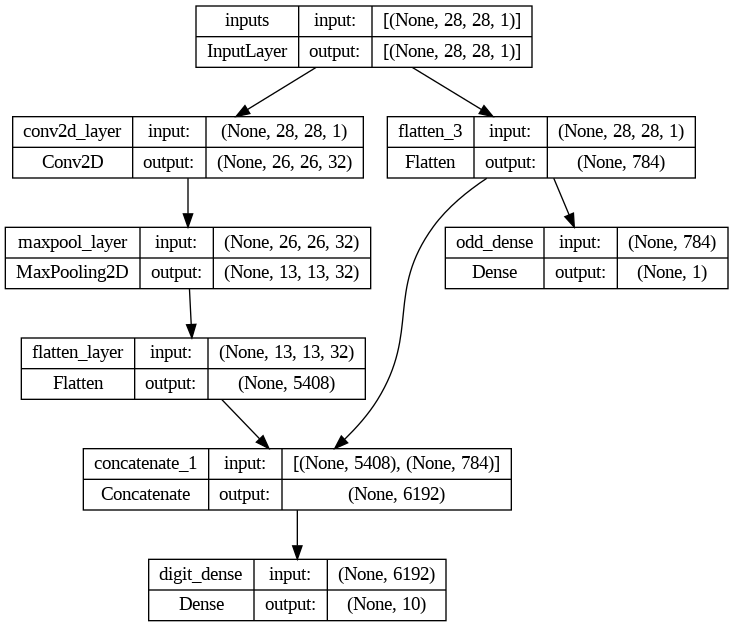

In [37]:
plot_model(model, show_shapes=True, show_layer_names=True)

주의
- 각 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 저장

In [38]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1,'odd_dense':0.5}, metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3729 - digit_dense_loss: 0.2103 - odd_dense_loss: 0.3250 - digit_dense_accuracy: 0.9405 - odd_dense_accuracy: 0.8639 - val_loss: 0.2300 - val_digit_dense_loss: 0.0922 - val_odd_dense_loss: 0.2756 - val_digit_dense_accuracy: 0.9709 - val_odd_dense_accuracy: 0.8898
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2164 - digit_dense_loss: 0.0805 - odd_dense_loss: 0.2717 - digit_dense_accuracy: 0.9769 - odd_dense_accuracy: 0.8913 - val_loss: 0.2095 - val_digit_dense_loss: 0.0777 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9750 - val_odd_dense_accuracy: 0.8961
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1919 - digit_dense_loss: 0.0604 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9819 - odd_dense_accuracy: 0.8956 - val_loss: 0.1891 - val_digit_dense_loss: 0.0580 - val_odd_dense_loss: 0.2622 - val_digit_dense_accuracy: 0.9799 -

In [39]:
# 모델 성능
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1901 - digit_dense_loss: 0.0608 - odd_dense_loss: 0.2587 - digit_dense_accuracy: 0.9839 - odd_dense_accuracy: 0.9017


[0.19011272490024567,
 0.06075203791260719,
 0.25872135162353516,
 0.9839000105857849,
 0.9017000198364258]

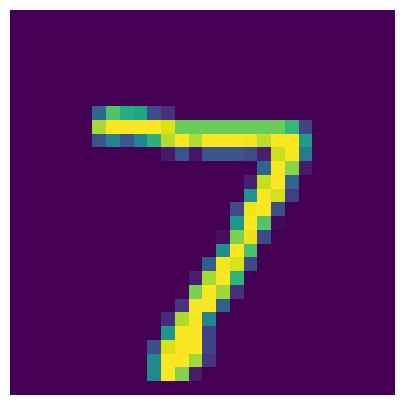

In [40]:
# 샘플 이미지 출력
def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid,0)

In [41]:
digit_preds, odd_preds = model.predict(x_valid_in)

# 숫자 7 이미지 예측확률
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 6ms/step
[2.5592688e-12 1.2208562e-11 2.4349076e-09 7.1801807e-08 6.0786331e-13
 1.0873727e-12 5.3991512e-21 9.9999982e-01 2.6281721e-09 3.3698799e-09]
[0.9994865]


예측 확률을 실제 정답 레이블로 변환(임계값:0.5)

In [42]:
digit_labels=np.argmax(digit_preds,axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [43]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]

### 3-4 전이 학습
- 이미 훈련된 모델의 일부를 가져와서 그대로 사용, 최종 출력층만 새롭게 추가하여 모델 재구성

In [44]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


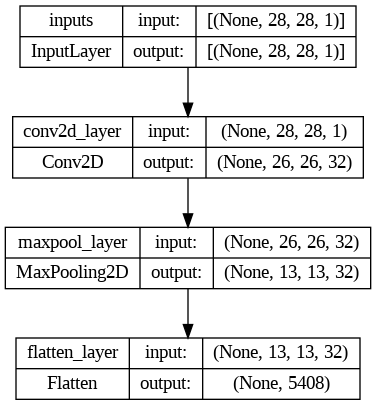

In [45]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

최종 분류기 역할을 하는 Dense 레이어를 추가

In [46]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


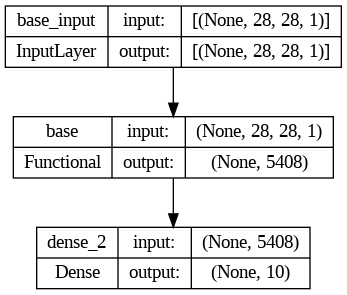

In [47]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

In [48]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1293 - accuracy: 0.9648 - val_loss: 0.0634 - val_accuracy: 0.9799
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 0.0607 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0435 - accuracy: 0.9872 - val_loss: 0.0553 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0552 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0532 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.0513 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0565 -

- 파라미터를 고정

In [49]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [50]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [51]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1151 - accuracy: 0.9688 - val_loss: 0.0644 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0488 - accuracy: 0.9857 - val_loss: 0.0502 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0591 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0529 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0524 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0640 - val_ac

모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정

In [52]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [53]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [54]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1155 - accuracy: 0.9689 - val_loss: 0.0569 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0488 - accuracy: 0.9857 - val_loss: 0.0508 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0362 - accuracy: 0.9894 - val_loss: 0.0473 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0539 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.0520 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0510 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0562 - val_ac